<h1 style="text-align:left;">Dimensionality Reduction: PCA, finding similar forwards</h1>


Este notebook es la respuesta a un departamento técnico que nos piden encontrar al delantero ideal para su equipo.

Se analizan diferentes equipos, entre ellos el Real Madrid CF. Y el objetivo de dicho análisis es encontrar al delantero ideal del Real Madrid CF. En ese contexto lo que se busca es conocer mejor al Real Madrid en cuanto a métricas de ataque y defensa, y una vez encontramos qué métricas el equipo debe mejorar (en este caso el Gol/Sh), buscamos a los delanteros centro que solucionen dicha carencia. Esto nos ofrece una serie de jugadores muy interesantes, los cuales pueden acarrear dos posibles problemas: el precio y el contexto.
 - Si el precio es muy elevado, debemos buscar delanteros que sean parecidos a los jugadores interesantes que buscamos, quizás encontramos delanteros con un precio menor.
 - Si el contexto no es favorable, es decir, que ese delantero ha obtenido unas métricas jugando con un estilo de juego diferente al nuestro, entonces ese jugador quizás no nos valdría. Tendría una métrica muy interesante, pero en su contexto, en el nuestro no.

<strong>
Por lo tanto:
    
 - Para solucionar el problema del precio lo que buscamos es encontrar similitudes y correlaciones entre diferentes jugadores.
 - Para solucionar el problema del contexto lo que buscamos es encontrar similitudes y correlaciones entre diferentes equipos.
 
</strong>

In [1]:
# Cargamos las librerías

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Cargamos el dataset
dt = pd.read_csv('data/PCA.csv')

In [3]:
dt.head()

,PlayerName,Edad,Goles,Asistencias,Tarjetas_Amarilla,Tarjetas_Roja,Goles_90Min,Asistencias_90Min,xG,npxG,xA,xG_90Min,xA_90Min
0,Maxi Gómez,20,17,4,12,0,0.50,0.12,13.4,13.4,4.7,0.39,0.14
1,Iago Aspas,29,22,5,9,0,0.68,0.15,16.4,14.2,6.5,0.50,0.20
2,Rony Lopes,21,15,6,2,0,0.53,0.21,9.8,9.8,5.5,0.35,0.19
3,Radamel Falcao,31,18,2,1,0,0.76,0.08,12.8,9.7,2.0,0.54,0.08
4,Keita Baldé,22,8,5,3,2,0.49,0.31,5.5,5.5,1.8,0.34,0.11


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 13 columns):
PlayerName           220 non-null object
Edad                 220 non-null int64
Goles                220 non-null int64
Asistencias          220 non-null int64
Tarjetas_Amarilla    220 non-null int64
Tarjetas_Roja        220 non-null int64
Goles_90Min          220 non-null float64
Asistencias_90Min    220 non-null float64
xG                   220 non-null float64
npxG                 220 non-null float64
xA                   220 non-null float64
xG_90Min             220 non-null float64
xA_90Min             220 non-null float64
dtypes: float64(7), int64(5), object(1)
memory usage: 22.5+ KB


Pasamos todas las métricas como matriz a <strong>X</strong>, y todos los nombres como matriz a <strong>y</strong>.

In [5]:
X, y = dt.iloc[:, 1:len(dt.columns)].values, dt.iloc[:, 0].values

Escalamos los datos

In [6]:
X_std = StandardScaler().fit_transform(X)

Reducimos dimensionalidad, sin perder información pero que nos comprima el dataset. 

In [7]:
pca = PCA(n_components = len(dt.columns)-1)
pca.fit(X_std)
X_pca = pca.transform(X_std)

Shape x_PCA:  (220, 12)
Explained Variance: 0 components: 0
Explained Variance: 2 components: 0.6241593633073852
Explained Variance: 4 components: 0.8188966030736122
Explained Variance: 6 components: 0.9358102785421444
Explained Variance: 8 components: 0.9883055002819888
Explained Variance: 10 components: 0.9985823484605271
Explained Variance: 12 components: 1.0000000000000002


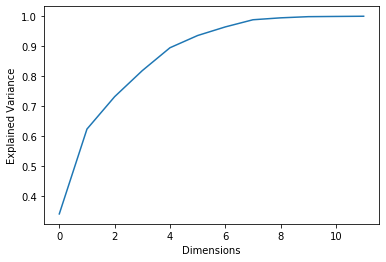

In [8]:
print("Shape x_PCA: ", X_pca.shape)
expl = pca.explained_variance_ratio_

for x in range(0, len(dt.columns), 2):
    print("Explained Variance: " + str(x) + " components:", sum(expl[0:x]))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.show()

Teníamos un total de 13 columnas, las cuales se han quedado en 12 porque no estamos trabajando con el nombre del jugador.

Con 12 componentes tenemos un 1.0 de información, es decir, el 100%. Con 2 dimensiones tenemos muy poca información. Con 4 ya tenemos algo más, y a partir de 6 tenemos casi toda. 
Si analizamos las columnas que tenemos hay variables como xG, xG_90Min y npxG, <strong>son variables que se autocorrelacionan entre sí, son la misma variable, multicolinealidad.

Observando la gráfica, podemos elegir 6 u 8 componentes. Vamos a elegir 8 componentes.

In [9]:
N_COMP = 8
columns = []

for col in range(1, N_COMP+1, 1):
    columns.append("PCA" + str(col))

dt_pca_resultado = pd.DataFrame(data=X_pca[:,0:N_COMP], columns=columns, index = y)

dt_pca_resultado.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
Maxi Gómez,1.465874,-0.665090,2.359233,-0.348661,2.792511,-1.455225,0.018045,-0.249727
Iago Aspas,3.299863,-0.888552,1.765272,-1.098257,0.131996,-0.987484,0.537074,-0.462364
Rony Lopes,0.905346,0.934378,-0.940415,0.015916,1.216068,0.211510,0.353553,-0.429352
Radamel Falcao,1.058265,-2.399472,-1.001846,-0.473766,-1.338642,0.305418,0.387916,-0.788921
Keita Baldé,-0.830868,0.912742,0.522135,3.896883,-0.141147,0.701544,-0.403042,-0.804182


In [11]:
corr_matrix = dt_pca_resultado.T.corr(method='pearson')

In [12]:
corr_matrix.head()

,Maxi Gómez,Iago Aspas,Rony Lopes,Radamel Falcao,Keita Baldé,Stevan Jovetic,Sergio León,Loren Morón,Antonio Sanabria,Jordan Ayew,Nolan Roux,Florent Mollet,Steve Mounié,Laurent Depoitre,Kevin-Prince Boateng,Sébastien Haller,Ante Rebic,Luka Jovic,Willian José,Mikel Oyarzabal,Juanmi,Edinson Cavani,Ángel Di María,Kylian Mbappé,Neymar,Matteo Politano,Gonzalo Higuaín,Paulo Dybala,Rodrigo,Simone Zaza,Santi Mina,Suso,Hakan Çalhanoglu,Nikola Kalinic,Patrick Cutrone,Antoine Griezmann,Ángel Correa,Kévin Gameiro,Emiliano Sala,Ivan Perišic,Mauro Icardi,Mariano,Memphis Depay,Nabil Fekir,Houssem Aouar,Bertrand Traoré,José Callejón,Lorenzo Insigne,Dries Mertens,Jimmy Briand,Wayne Rooney,Oumar Niasse,Jonathan Bamba,Rémy Cabella,Robert Beric,Pascal Groß,Glenn Murray,Eden Hazard,Álvaro Morata,Willian,Edin Džeko,Stephan El Shaarawy,Cengiz Ünder,Roberto Inglese,Nicolas Pépé,Kevin Volland,Julian Brandt,Leon Bailey,Lucas Alario,Guido Burgstaller,Leonardo Pavoletti,Stéphane Bahoken,Kike,Charles,Raheem Sterling,Leroy Sané,Sergio Agüero,Gabriel Jesus,Bernardo Silva,Benjamin Bourigeaud,Wahbi Khazri,Ayoze Pérez,Dwight Gayle,Pierre-Emerick Aubameyang,Maximilian Philipp,Marco Reus,Michy Batshuayi,Pablo Sarabia,Wissam Ben Yedder,Luis Muriel,Timo Werner,Jean-Kévin Augustin,Gerard Moreno,Léo Baptistão,Nils Petersen,Jamie Vardy,Riyad Mahrez,Shinji Okazaki,Yoshinori Muto,José Luis Morales,Emmanuel Boateng,Ashley Barnes,Chris Wood,Bryan Cristante,Papu Gómez,Josip Ilicic,Portu,Cristhian Stuani,Fabio Quagliarella,Duván Zapata,Naïm Sliti,Kwon Chang-hoon,Júlio Tavares,Wesley Saïd,Munir El Haddadi,Ibai Gómez,Mohamed Salah,Roberto Firmino,Sadio Mané,Philippe Coutinho,Marko Arnautovic,Javier Hernández,Jorge Molina,Ángel Rodríguez,Ivan Santini,Ciro Immobile,Luis Alberto,Karl Toko Ekambi,Gianluca Lapadula,Max Kruse,Salomón Rondón,Jay Rodriguez,Niclas Füllkrug,Martin Harnik,Daniel Ginczek,Mario Gómez,Florian Thauvin,Dimitri Payet,Valère Germain,Lucas Ocampos,Kostas Mitroglou,Clinton N'Jie,Adama Niane,Suk Hyun-jun,Cristiano Ronaldo,Isco,Gareth Bale,Marco Asensio,Cheick Diabaté,Daniel Didavi,Divock Origi,Joshua King,Callum Wilson,Wilfried Zaha,Giovanni Simeone,Federico Chiesa,Max Gradel,Yaya Sanogo,Christian Eriksen,Harry Kane,Dele Alli,Son Heung-min,Dušan Tadic,Charlie Austin,Thorgan Hazard,Lars Stindl,Raffael,Marcello Trotta,Ante Budimir,Simeon Nwankwo,Iñaki Williams,Raúl García,Aritz Aduriz,Carlos Bacca,Samu Castillejo,Cédric Bakambu,Lucas Pérez,Adrián López,Florin Andone,Giovanni Sio,Isaac Mbenza,Salomon Kalou,Davie Selke,Vedad Ibiševic,Lewis Holtby,Gaël Kakuta,Moussa Konaté,Lionel Messi,Luis Suárez,Philippe Coutinho,Simone Verdi,Mattia Destro,Mirco Antenucci,Alberto Paloschi,Romelu Lukaku,Jesse Lingard,Anthony Martial,Marcus Rashford,Alexandre Lacazette,Alexis Sánchez,Pierre-Emerick Aubameyang,Xherdan Shaqiri,Mame Biram Diouf,Alassane Pléa,Mario Balotelli,Malcom,François Kamano,Iago Falque,Andrea Belotti,Adem Ljajic,Michael Gregoritsch,Alfreð Finnbogason,Robert Lewandowski,Thomas Müller,Sandro Wagner,Kevin Lasagna,Mark Uth,Andrej Kramaric,Serge Gnabry,Jonathan Calleri
Maxi Gómez,1.000000,0.650051,0.073052,-0.080459,-0.308697,-0.165373,0.386770,-0.079422,-0.133764,-0.355545,0.681215,0.167285,-0.127861,-0.429815,-0.160720,-0.301098,0.352145,0.052412,0.569792,0.366680,-0.127372,0.265247,-0.367817,0.076961,-0.074513,-0.455523,0.327658,0.002188,0.502697,0.291877,0.427117,-0.551400,-0.312429,-0.302531,0.259465,0.356177,-0.238637,-0.903053,-0.088138,-0.055471,0.331440,0.764129,0.146866,0.726946,-0.271209,0.353331,-0.276945,-0.017518,0.157391,0.011518,-0.014386,-0.434731,-0.412595,-0.435745,-0.603627,-0.408338,0.483584,-0.414324,0.686569,-0.586184,0.395544,-0.511776,-0.366360,0.118415,0.506229,0.607836,-0.469032,-0.166329,0.000874,0.586825,0.594528,0.213255,0.276179,-0.213116,0.051992,-0.068488,0.066165,0.619619,-0.467722,-0.217426,0.258192,-0.179946,-0.205687,-0.139099,-0.387083,-0.474919,-0.057095,-0.073257,-0.409287,0.001830,0.019417,-0.190563,0.441691,0.219408,-0.014115,0.

Esta función nos devuelve una lista de jugadores con el factor de correlación ordenadas de mayor a menor.

In [13]:
def GetSimilarPlayers(PlayerName, numPlayers, corr_matrix):
    
    SimPlayers = pd.DataFrame(columns = ['PlayerName', 'Similar Player', 'Correlation Factor'])

    i = 0
    for i in range(0, numPlayers):
        row = corr_matrix.loc[corr_matrix.index == PlayerName].squeeze()

        SimPlayers.at[i, 'PlayerName'] = PlayerName
        SimPlayers.at[i, 'Similar Player'] = row.nlargest(i+2).sort_values(ascending=True).index[0]
        SimPlayers.at[i, 'Correlation Factor'] = row.nlargest(i+2).sort_values(ascending=True)[0]

        i = i+1
    
    return SimPlayers

Se puede testear la función con cualquier nombre.

In [14]:
PlayerName = 'Edin Džeko'
NumPlayers = 10

df_correlatedPlayers = GetSimilarPlayers(PlayerName, NumPlayers, corr_matrix)

df_correlatedPlayers

,PlayerName,Similar Player,Correlation Factor
0,Edin Džeko,Rodrigo,0.874301
1,Edin Džeko,Gonzalo Higuaín,0.852456
2,Edin Džeko,Harry Kane,0.820612
3,Edin Džeko,Cristhian Stuani,0.818274
4,Edin Džeko,Edinson Cavani,0.801042
5,Edin Džeko,Karl Toko Ekambi,0.794172
6,Edin Džeko,Luis Suárez,0.793995
7,Edin Džeko,Cristiano Ronaldo,0.791281
8,Edin Džeko,Robert Lewandowski,0.780246
9,Edin Džeko,Gerard Moreno,0.778505
